In [30]:
# --- Import libraries ---
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from collections import Counter
import nltk

In [31]:
try:
    nltk.data.find("corpora/stopwords")
except:
    nltk.download("stopwords")

from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

In [32]:
df = pd.read_csv("IMDB Dataset.csv")

import html

def clean_text(text):
    text = html.unescape(text)                 # Handle HTML entities
    text = re.sub(r"<.*?>", " ", text)         # Remove HTML tags like <br />
    text = re.sub(r"[^a-z\s]", " ", text.lower())  # Remove numbers/punctuation
    tokens = text.split()
    tokens = [t for t in tokens if t not in stop_words and len(t) > 2]
    return " ".join(tokens)
    
df["clean_text"] = df["review"].apply(clean_text)

# Encode sentiment as 1 = positive, 0 = negative
df["label"] = df["sentiment"].map({"positive":1, "negative":0})

In [33]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(
    df["clean_text"], df["label"], test_size=0.2, random_state=42, stratify=df["label"]
)

In [34]:
# Convert Text to Numbers 
count_vectorizer = CountVectorizer(max_features=2000)
tfidf_vectorizer = TfidfVectorizer(max_features=2000)

X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [35]:
# Logistic Regression
lr_count = LogisticRegression(max_iter=1000)
lr_tfidf = LogisticRegression(max_iter=1000)

# Naive Bayes
nb_count = MultinomialNB()
nb_tfidf = MultinomialNB()

# Fit models
lr_count.fit(X_train_count, y_train)
lr_tfidf.fit(X_train_tfidf, y_train)
nb_count.fit(X_train_count, y_train)
nb_tfidf.fit(X_train_tfidf, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [36]:
# Evaluate Models
def evaluate(model, X_test, y_test, name):
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"Model: {name}")
    print("Accuracy:", round(acc,4))
    print(classification_report(y_test, preds))
    print("Confusion Matrix:\n", confusion_matrix(y_test, preds))
    print("-"*50)

evaluate(lr_count, X_test_count, y_test, "Logistic Regression (Count)")
evaluate(nb_count, X_test_count, y_test, "Naive Bayes (Count)")
evaluate(lr_tfidf, X_test_tfidf, y_test, "Logistic Regression (TF-IDF)")
evaluate(nb_tfidf, X_test_tfidf, y_test, "Naive Bayes (TF-IDF)")

Model: Logistic Regression (Count)
Accuracy: 0.8763
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      5000
           1       0.88      0.87      0.88      5000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

Confusion Matrix:
 [[4404  596]
 [ 641 4359]]
--------------------------------------------------
Model: Naive Bayes (Count)
Accuracy: 0.8435
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      5000
           1       0.84      0.84      0.84      5000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000

Confusion Matrix:
 [[4221  779]
 [ 786 4214]]
--------------------------------------------------
Model: Logistic Regression (TF-IDF)
Accuracy: 0.8832
   

In [37]:
def plot_top_words(texts, title, n=10):
    counter = Counter(" ".join(texts).split())
    common = counter.most_common(n)
    words, counts = zip(*common)
    plt.bar(words, counts)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

In [38]:
neutral_words = {"movie", "film", "one", "time", "like", "would", "even", "story", "character"}

def clean_text_visual(text):
    text = re.sub(r"<.*?>", " ", text)
    text = re.sub(r"[^a-z\s]", " ", text.lower())
    tokens = text.split()
    tokens = [t for t in tokens if t not in stop_words and t not in neutral_words and len(t) > 2]
    return " ".join(tokens)

df["visual_text"] = df["review"].apply(clean_text_visual)

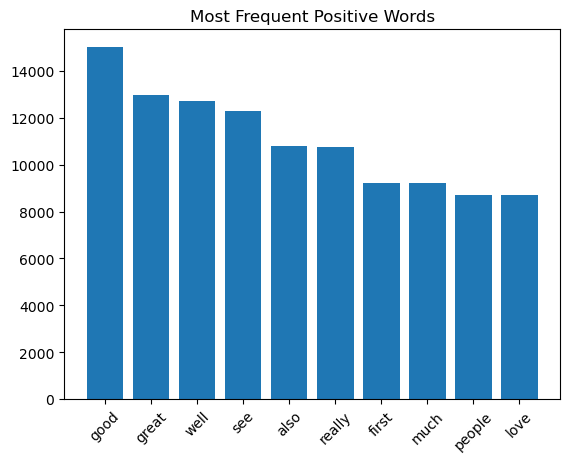

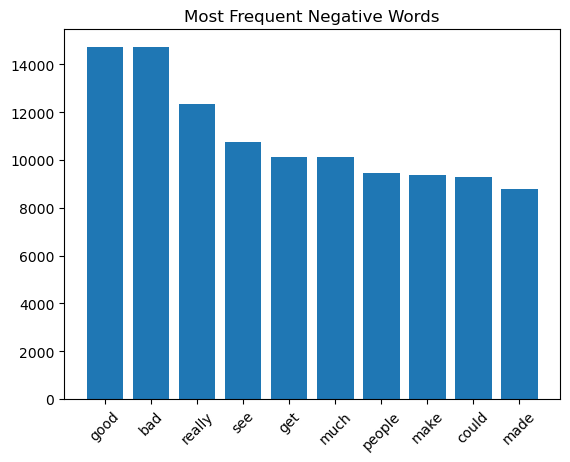

In [39]:
plot_top_words(df[df["label"]==1]["visual_text"], "Most Frequent Positive Words")
plot_top_words(df[df["label"]==0]["visual_text"], "Most Frequent Negative Words")

In [40]:
# Compare Accuracy
results = {
    "Model": [
        "Logistic Regression (Count)",
        "Naive Bayes (Count)",
        "Logistic Regression (TF-IDF)",
        "Naive Bayes (TF-IDF)"
    ],
    "Accuracy": [
        accuracy_score(y_test, lr_count.predict(X_test_count)),
        accuracy_score(y_test, nb_count.predict(X_test_count)),
        accuracy_score(y_test, lr_tfidf.predict(X_test_tfidf)),
        accuracy_score(y_test, nb_tfidf.predict(X_test_tfidf))
    ]
}

In [41]:
results_df = pd.DataFrame(results)
print("\n=== Model Accuracy Comparison ===")
print(results_df)


=== Model Accuracy Comparison ===
                          Model  Accuracy
0   Logistic Regression (Count)    0.8763
1           Naive Bayes (Count)    0.8435
2  Logistic Regression (TF-IDF)    0.8832
3          Naive Bayes (TF-IDF)    0.8524


In [42]:
# --- Step 9 (Optional): Save Results ---
results_df.to_csv("sentiment_analysis_results.csv", index=False)
print("\nResults saved to 'sentiment_analysis_results.csv'")


Results saved to 'sentiment_analysis_results.csv'
